# Part 1

In [453]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from itertools import combinations

### Loading the iris dataset using pandas

In [454]:
iris_df = pd.read_csv('Iris.csv')


## Q1 General analysis

In [455]:
print("Features: ")
print(list(iris_df.columns))

print("Sample: ")
print(iris_df.head())

print("Ranges & Scales: ")
iris_df.describe()

Features: 
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
Sample: 
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Ranges & Scales: 


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Q2 Test Train split

In [456]:
def logistic_regressor_accuray(dataset, test_size_ratio):
  train, test = train_test_split(dataset, test_size=test_size_ratio)
  train_x = train.iloc[:, 1:-1]
  train_y = train.iloc[:, -1]
  test_x = test.iloc[:, 1:-1]
  test_y = test.iloc[:, -1]

  clf = LogisticRegression(max_iter=1000).fit(train_x, train_y.values.ravel())
  return clf.score(X=test_x, y=test_y.values.ravel())

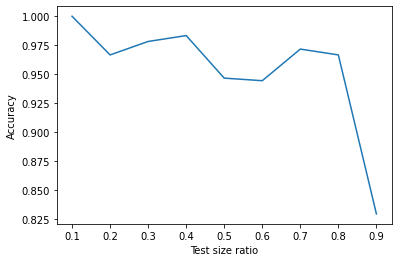

In [457]:
test_size_ratios = np.arange(0.1, 1, 0.1)
accuracies = [logistic_regressor_accuray(dataset=iris_df, test_size_ratio=r) for r in test_size_ratios]
plt.plot(test_size_ratios, accuracies)
plt.xlabel('Test size ratio')
plt.ylabel('Accuracy')
plt.show()

## Q3 Balanced dataset

Q: The 150-sample dataset is completely balanced what does that mean?

A: It means that the given samples are distributed equally between the 3 available labels as shown below:

Label distribution of the Balanced dataset:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


<AxesSubplot:ylabel='Species'>

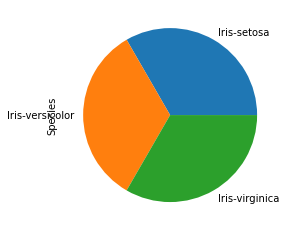

In [458]:
balanced_species_records = iris_df['Species'].value_counts()
print("Label distribution of the Balanced dataset:")
print(balanced_species_records)
balanced_species_records.plot.pie()

### Creating unbalanced subset of 110

Label distribution of the Unbalanced dataset:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     11
Name: Species, dtype: int64


<AxesSubplot:ylabel='Species'>

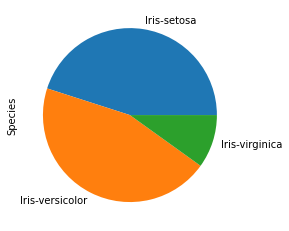

In [459]:
ub_iris = iris_df.loc[0:110, :]

# Plotting the new dataset label distribution
unbalanced_species_records = ub_iris['Species'].value_counts()
print("Label distribution of the Unbalanced dataset:")
print(unbalanced_species_records)
unbalanced_species_records.plot.pie()

## Q4 Label Balancing

Label distribution of the new dataframe:
Iris-setosa        11
Iris-versicolor    11
Iris-virginica     11
Name: Species, dtype: int64


<AxesSubplot:ylabel='Species'>

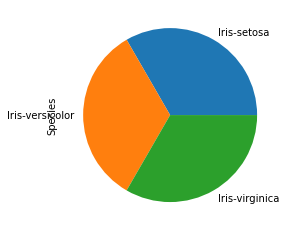

In [460]:
counts = ub_df['Species'].value_counts()
l_min = min(counts)

rand_dataset = ub_df.sample(frac=1)
balanced_df = rand_dataset.groupby('Species').head(l_min).sort_values(by='Species').reset_index(drop=True)

# Plotting the new dataframe label distribution
balanced_species_records = balanced_df['Species'].value_counts()
print("Label distribution of the new dataframe:")
print(balanced_species_records)
balanced_species_records.plot.pie()

### Training and Testing the new balanced dataset

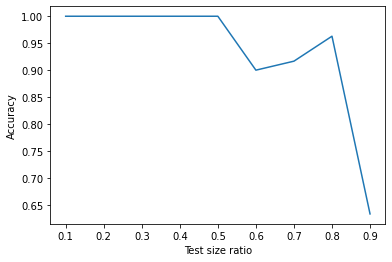

In [461]:
test_size_ratios = np.arange(0.1, 1, 0.1)
accuracies = [logistic_regressor_accuray(dataset=balanced_df, test_size_ratio=r) for r in test_size_ratios]
plt.plot(test_size_ratios, accuracies)
plt.xlabel('Test size ratio')
plt.ylabel('Accuracy')
plt.show()

## Q5 naive feature selection

In [464]:
def naive_k_features(k, train_set, test_set):

  def fit_logistic(train_x, train_y, test_x, test_y):
    clf = LogisticRegression(max_iter=1000).fit(train_x, train_y.values.ravel())
    return clf.score(X=test_x, y=test_y.values.ravel())
  
  learnable_columns = iris_df.columns[1:-1]
  classes_column = list(iris_df.columns[-1:])
  k_columns = [list(columns) for columns in list(combinations(learnable_columns, k))]
  accuracies = [fit_logistic(train_set[columns], train_set[classes_column], test_set[columns], test_set[classes_column]) for columns in k_columns]

  return k_columns[np.argmax(accuracies)]

In [465]:
# Running the function we defined with k=2

train_set, test_set = train_test_split(iris_df, test_size=0.8)

print("The best accuracy columns are:")
print(naive_k_features(k=2, train_set=train_set, test_set=test_set))

The best accuracy columns are:
['PetalLengthCm', 'PetalWidthCm']
